<b>PREDICTING BANK MARKETING CAMPAIGN SUCCESS USING MACHINE LEARNING

<b>Problem Statement:
</b>The goal of this project is to perform post-campaign analytics to identify the potential subscribers of the term deposit product for future campaigns. The data mining task is to create a classification model identifying potential subscribers by using supervised learning algorithms. 

<b>Dataset Description:
</b>The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to assess if the product (bank term deposit) would be ('yes') or not ('no') subscribed. It is publicly available in the UCI Machine learning Repository, which can be retrieved from http://archive.ics.uci.edu/ml/datasets/Bank+Marketing#.


<b>PART 1. DATA DESCRIPTION

In [1]:
# import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [2]:
# load the data file
df = pd.read_csv('bank-additional-full.csv', sep=';')

In [3]:
# explore the data
df.shape

(41188, 21)

There are 21 columns and 41188 rows in the data. The 'y' column will be the target variable. The other columns will be the predictors. 

In [4]:
df.head(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
7,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
9,25,services,single,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
age               41188 non-null int64
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
default           41188 non-null object
housing           41188 non-null object
loan              41188 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp.var.rate      41188 non-null float64
cons.price.idx    41188 non-null float64
cons.conf.idx     41188 non-null float64
euribor3m         41188 non-null float64
nr.employed       41188 non-null float64
y                 41188 non-null object
dtypes: float64(5), int64(5), object(11)
memory usa

There is no non-null values in each column. However, when we look at some sample data, we see unknown values. Unknown values are also missing values. We will try to find these values in the following steps. 

In [6]:
#summary statistics
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


The above columns 'age, duration, campaign, pdays, previous, emp.var.rate, cons.price.idx, cons.conf.idx, euribor3m and nr.employed' are numerical columns. When we summarize their statistics, we can make comments for each numerical columns. 

<b>age</b> : Its minumum value is 17 and maximum values is 98. Its mean is 40 and median is 38. We can say that it looks like normal distribution.

<b>duration</b> : Its standart deviation is 259.27. We can say that it is very spread data. Its maximum value is 4918 while its mean is 258.25. It would have some greater value outliers.

<b>campaign</b> : While its mean is 2.56 and median is 2, its maximum value is 56. There would be outliers.

<b>pdays</b> : There is something strange in this column. Most of the values in this column is 999. Only a few rows have different values. We should make a deep analyze for this column in the future. 

<b>previous</b>: This column is also very strange. Most of the values equal to zero. Only a few of values are greater than zero. 
We will analyze this column deeply in the future.

<b>emp.var.rate</b> : This variable has negative and positive values. The number of negative values are higher that positive values.

<b>cons.price.idx</b> : The standart deviation of this variable is low. It means that the values spread in a limited area. 

<b>cons.conf.idx</b> : The standart deviation of this variable is low. It means that the values spread in a limited area. Also, it includes only negative values.

<b>euribor3m</b> : The mean of this variable is 3.62. The median is 4.85. The values look like normal. 

<b>nr.employed</b> : The feature looks normal. The values spread between 4963 and 5228.

In [7]:
# rename some column names.
df = df.rename({'emp.var.rate' : 'empvarrate','cons.price.idx' : 'conspriceidx','cons.conf.idx': 'consconfidx', 'nr.employed':'nremployed','y':'subscribed'}, axis = 'columns')
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,empvarrate,conspriceidx,consconfidx,euribor3m,nremployed,subscribed
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


We changed the name of 'y' column to 'subscribed' because it will be more clear to understand the meaning of this variable in the visualization part. Also, we changed column names including dot sign because it can produce coding error. 

<b> PART 2. EXPLORATORY DATA ANALYSIS

<b> Target Variable:

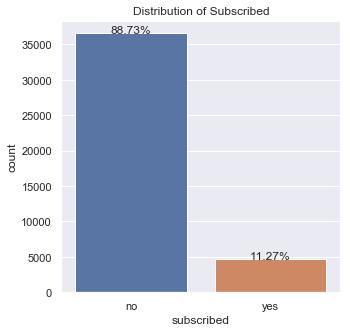

In [8]:
# explore the target variable
total = float(len(df))
sns.set()
plt.figure(figsize=(5,5))
ax = sns.countplot(x='subscribed', data=df)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2%}'.format(height/total,),
            ha="center") 
plt.title('Distribution of Subscribed')
plt.show()

%88.73 of the target variable, subscribed, include 'no' values. Only %11.27 of the variable is 'yes'. 

<b> Numerical Variables:

<b> 1. Age:
    </b>Age of the client

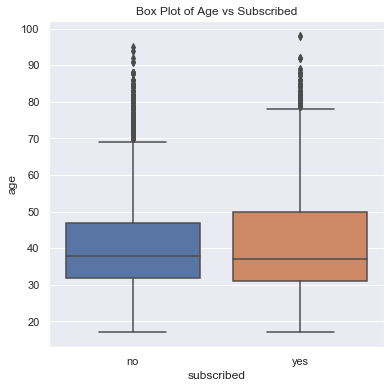

In [9]:
# boxplot of age
_ = plt.figure(figsize=(6,6))
_ = sns.boxplot(x= 'subscribed', y= 'age', data = df)
_ = plt.title('Box Plot of Age vs Subscribed')
_ = plt.show()

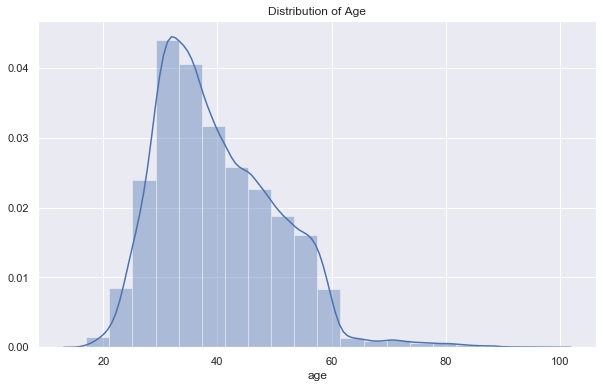

In [10]:
# distribution of age
_ = plt.figure(figsize=(10,6))
_ = sns.distplot(df['age'], bins=20)
_ = plt.title('Distribution of Age')
_ = plt.show()

In [11]:
# summarize age statistics
df.age.describe()

count    41188.00000
mean        40.02406
std         10.42125
min         17.00000
25%         32.00000
50%         38.00000
75%         47.00000
max         98.00000
Name: age, dtype: float64

In [12]:
# hypotesis test for difference of age_yes mean and age_no mean.
age_yes = df[df.subscribed == 'yes']
age_no = df[df.subscribed == 'no'] 
t_test = stats.ttest_ind(age_yes.age, age_no.age)
print('age :', t_test)

age : Ttest_indResult(statistic=6.172087109640128, pvalue=6.80213641846347e-10)


In [13]:
# create age groups.
lst = [df]
for column in lst:
    column.loc[column["age"] < 30,'age_group'] = 20
    column.loc[(column["age"] >= 30) & (column["age"] < 40),'age_group'] = 30
    column.loc[(column["age"] >= 40) & (column["age"] < 50),'age_group'] = 40
    column.loc[(column["age"] >= 50) & (column["age"] < 60),'age_group'] = 50
    column.loc[column["age"] >= 60, 'age_group'] = 60

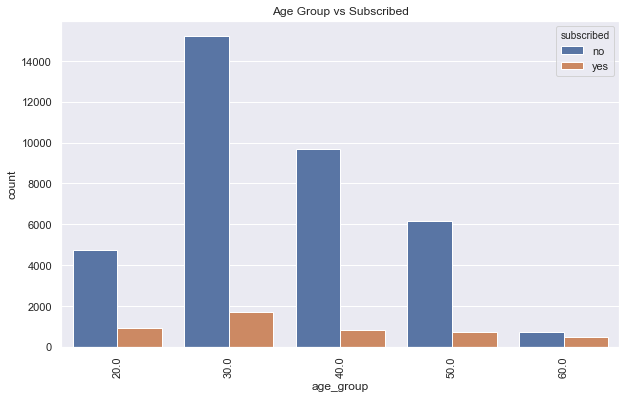

In [14]:
# distribution of age_group vs subscribed.
plt.figure(figsize=(10,6))
sns.countplot(x='age_group', hue='subscribed', data=df)
plt.title('Age Group vs Subscribed')
plt.xticks(rotation='vertical')
plt.show()

In [15]:
print(pd.crosstab(df.age_group, df.subscribed, normalize= 'index'))

subscribed        no       yes
age_group                     
20.0        0.837361  0.162639
30.0        0.898748  0.101252
40.0        0.920768  0.079232
50.0        0.898426  0.101574
60.0        0.604359  0.395641


Analysis:
1. There are outliers which are greater than 70.
2. The %50 of the age values are distributed between age 32 and 47.
3. There is a difference between means of age subscribing 'yes' and 'no'. The age variable is statistically significant at 95% confidence interval.
4. Ages of more than 60 has higher success rate to subscribe term deposit. Ages less than 30 comes second to positive subscribed. Age of 40 has the less success rate comparing with other ages group. 

<b>2. Duration:
    </b>Duration of last contact in seconds

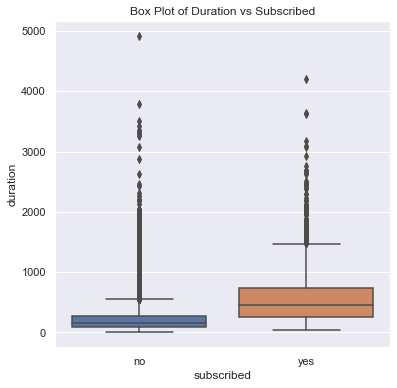

In [16]:
# boxplot of duration
_ = plt.figure(figsize=(6,6))
_ = sns.boxplot(x= 'subscribed', y= 'duration', data = df)
_ = plt.title('Box Plot of Duration vs Subscribed')
_ = plt.show()

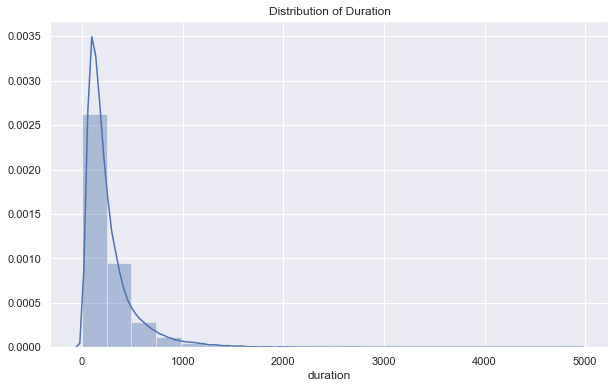

In [17]:
# distribution of duration
_ = plt.figure(figsize=(10,6))
_ = sns.distplot(df['duration'], bins = 20)
_ = plt.title('Distribution of Duration')
_ = plt.show()

In [18]:
# summarize duration statistics.
df.duration.describe()

count    41188.000000
mean       258.285010
std        259.279249
min          0.000000
25%        102.000000
50%        180.000000
75%        319.000000
max       4918.000000
Name: duration, dtype: float64

In [19]:
# hypotesis test for difference of duration_yes mean and duration_no mean.
duration_yes = df[df.subscribed == 'yes']
duration_no = df[df.subscribed == 'no'] 
t_test = stats.ttest_ind(duration_yes.duration, duration_no.duration)
print('duration :', t_test)

duration : Ttest_indResult(statistic=89.9672253349018, pvalue=0.0)


Analysis:

This duration variable highly affects the target variable. However, the duration is not known before a call is performed. After the end of the call y is obviously known. Thus, this input variable should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model. As a result, the duration variable will be dropped.

<b>3. Campaign:
    </b> Number of contacts performed during this campaign for this client (including last contact)

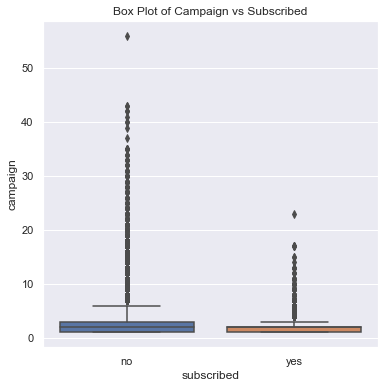

In [20]:
# boxplot of campaign
_ = plt.figure(figsize=(6,6))
_ = sns.boxplot(x= 'subscribed', y= 'campaign', data = df)
_ = plt.title('Box Plot of Campaign vs Subscribed')
_ = plt.show()

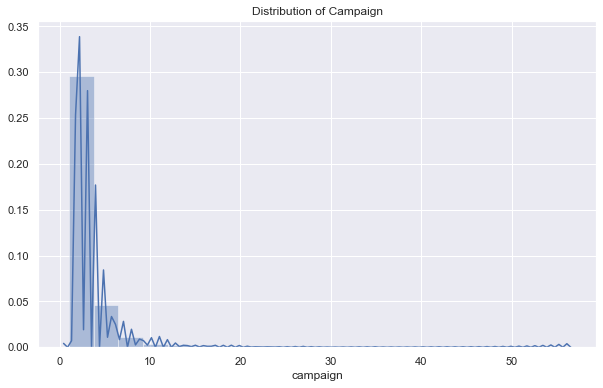

In [21]:
# distribution of campaign
_ = plt.figure(figsize=(10,6))
_ = sns.distplot(df['campaign'], bins = 20)
_ = plt.title('Distribution of Campaign')
_ = plt.show()

In [22]:
# summarize campaign statistics.
df.campaign.describe()

count    41188.000000
mean         2.567593
std          2.770014
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         56.000000
Name: campaign, dtype: float64

In [23]:
# hypotesis test for difference of campaign_yes mean and campaign_no mean.
campaign_yes = df[df.subscribed == 'yes']
campaign_no = df[df.subscribed == 'no'] 
t_test = stats.ttest_ind(campaign_yes.campaign, campaign_no.campaign)
print('campaign :', t_test)

campaign : Ttest_indResult(statistic=-13.496542997299592, pvalue=2.0077799906175704e-41)


Analysis:

1. There are outliers in campaign variable. The outliers are almost greater that 20.
2. %50 of the variable consist of one and two contacts number. 
3. There is a difference between means of campaign subscribing 'yes' and 'no'. The campaign variable is statistically significant at 95% confidence interval.

<b>4. Pdays :  </b>
    Number of days since the client was last contacted in a previous campaign

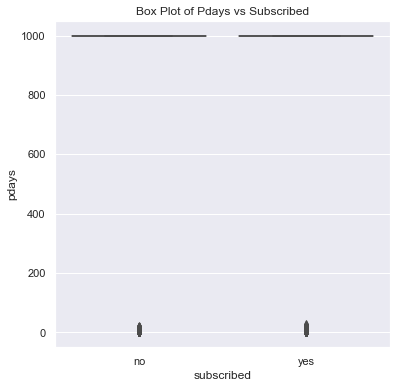

In [24]:
# boxplot of pdays
_ = plt.figure(figsize=(6,6))
_ = sns.boxplot(x= 'subscribed', y= 'pdays', data = df)
_ = plt.title('Box Plot of Pdays vs Subscribed')
_ = plt.show()

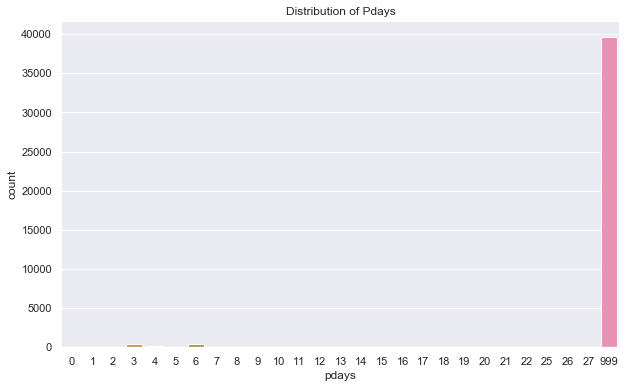

In [25]:

# distribution of pdays regarding value counts.
_ = plt.figure(figsize=(10,6))
_ = sns.countplot('pdays', data= df)
_ = plt.title('Distribution of Pdays')
_ = plt.show()

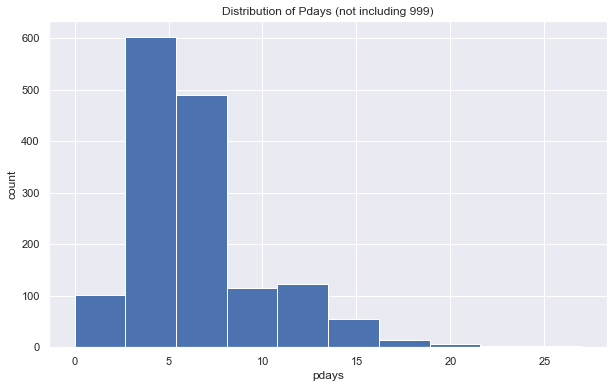

In [26]:
# distribution of pdays not including the value of 999.
_ = plt.figure(figsize=(10,6))
_ = plt.hist(df.loc[df.pdays != 999, 'pdays'])
_ = plt.title('Distribution of Pdays (not including 999)')
_ = plt.xlabel('pdays')
_ = plt.ylabel('count')
_ = plt.show()

In [27]:
# analyze the relationship of pdays values and poutcome values.
pd.crosstab(df['pdays'],df['poutcome'], values=df['age'], aggfunc='count', normalize=True)

poutcome,failure,nonexistent,success
pdays,,,
0,0.000000,0.000000,0.000364
1,0.000000,0.000000,0.000631
2,0.000000,0.000000,0.001481
3,0.000097,0.000000,0.010561
4,0.000049,0.000000,0.002816
5,0.000097,0.000000,0.001020
6,0.000607,0.000000,0.009396
7,0.000364,0.000000,0.001093
8,0.000146,0.000000,0.000291


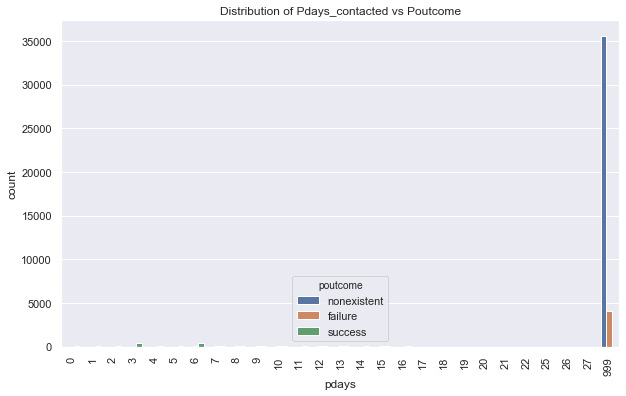

In [28]:
# distribution of pdays_contacted 
_ = plt.figure(figsize=(10,6))
_ = sns.countplot(x='pdays', hue='poutcome', data=df)
_ = plt.title('Distribution of Pdays_contacted vs Poutcome')
_ = plt.xticks(rotation='vertical')
_ = plt.show()

Analysis:

The boxplots of pdays variable look very strange so we looked into their values in detailed. We can see majority of the values in pdays are 999 and its stated in the variable description that 999 means client wasn’t previously contacted. When we analyze other variables we see that poutcome variable also has the same meaning value 'nonexistent'. All nonexistent values match with 999. Thus, we will drop this pdays variable in our model.

<b>5. Previous :  </b>
    Number of contacts performed before this campaign for this client

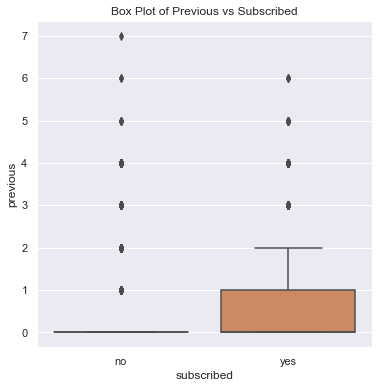

In [29]:
# boxplot of previous
_ = plt.figure(figsize=(6,6))
_ = sns.boxplot(x= 'subscribed', y= 'previous', data = df)
_ = plt.title('Box Plot of Previous vs Subscribed')
_ = plt.show()

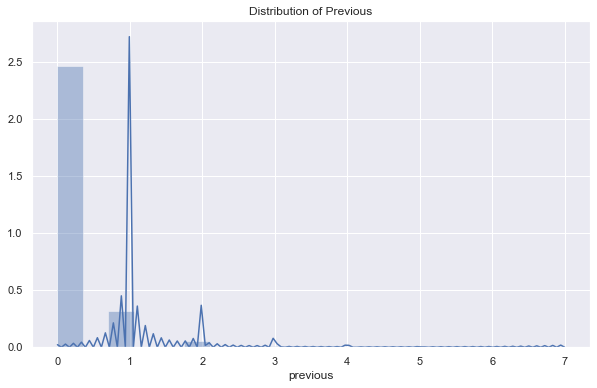

In [30]:
# distribution of previous
_ = plt.figure(figsize=(10,6))
_ = sns.distplot(df['previous'], bins = 20)
_ = plt.title('Distribution of Previous')
_ = plt.show()

In [31]:
# summarize previous statistics.
df.previous.describe()

count    41188.000000
mean         0.172963
std          0.494901
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          7.000000
Name: previous, dtype: float64

In [32]:
# hypotesis test for difference of previous_yes mean and previous_no mean.
previous_yes = df[df.subscribed == 'yes']
previous_no = df[df.subscribed == 'no'] 
t_test = stats.ttest_ind(previous_yes.previous, previous_no.previous)
print('age :', t_test)

age : Ttest_indResult(statistic=48.00267792469279, pvalue=0.0)


Analysis:

1. There are outiers in previous variable. Almost more than 3 number of contacts can be outlier.
2. The major of number of contacts is zero. It means that most of the clients was not contacted before this campaign.
3. The p value of our hypotesis that there is no difference between the means of previous variable in terms of subscribing term credit, is smaller than 0.05 so we reject the hypotesis. As a result, precious variable is statistically significant at 0.95 confidence level. 

<b> 6. Empvarrate : </b>
Employment variation rate (quarterly indicator)

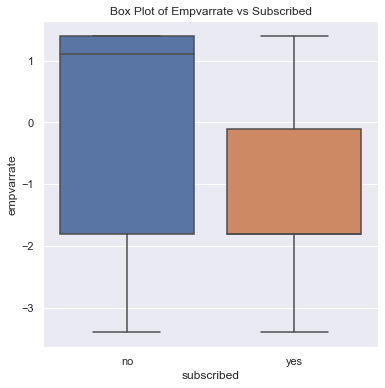

In [33]:
# boxplot of empvarrate
_ = plt.figure(figsize=(6,6))
_ = sns.boxplot(x= 'subscribed', y= 'empvarrate', data = df)
_ = plt.title('Box Plot of Empvarrate vs Subscribed')
_ = plt.show()

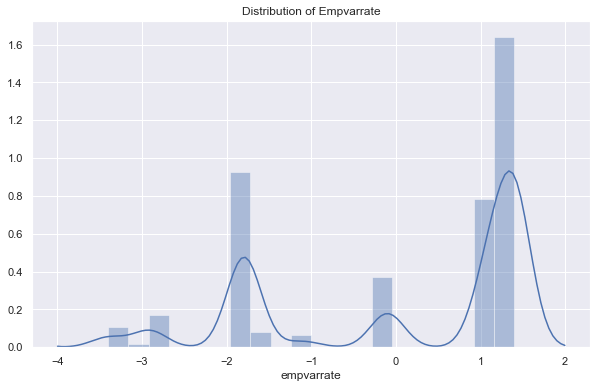

In [34]:
# distribution of empvarrate
_ = plt.figure(figsize=(10,6))
_ = sns.distplot(df['empvarrate'], bins = 20)
_ = plt.title('Distribution of Empvarrate')
_ = plt.show()

In [35]:
# summarize empvarrate statistics.
df.empvarrate.describe()

count    41188.000000
mean         0.081886
std          1.570960
min         -3.400000
25%         -1.800000
50%          1.100000
75%          1.400000
max          1.400000
Name: empvarrate, dtype: float64

In [36]:
# hypotesis test for difference of empvarrate_yes mean and empvarrate_no mean.
empvarrate_yes = df[df.subscribed == 'yes']
empvarrate_no = df[df.subscribed == 'no'] 
t_test = stats.ttest_ind(empvarrate_yes.empvarrate, empvarrate_no.empvarrate)
print('emp.var.rate :', t_test)

emp.var.rate : Ttest_indResult(statistic=-63.433665552940745, pvalue=0.0)


Analysis:

1. There is no outlier.
2. There are negative and postive employment variance rates. The mean of the variance rate is 0.08.
3. The empvarrate variable is statistically signicant at 95% confidence interval.

<b> 7. Conspriceidx : </b>
Consumer price index (monthly indicator)

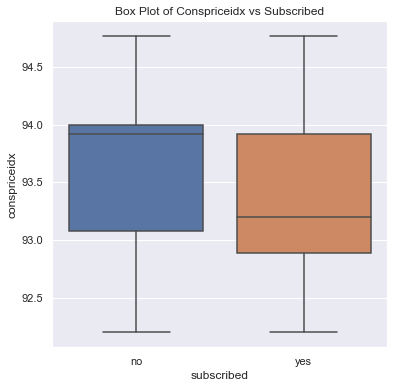

In [37]:
# boxplot of conspriceidx
_ = plt.figure(figsize=(6,6))
_ = sns.boxplot(x= 'subscribed', y= 'conspriceidx', data = df)
_ = plt.title('Box Plot of Conspriceidx vs Subscribed')
_ = plt.show()

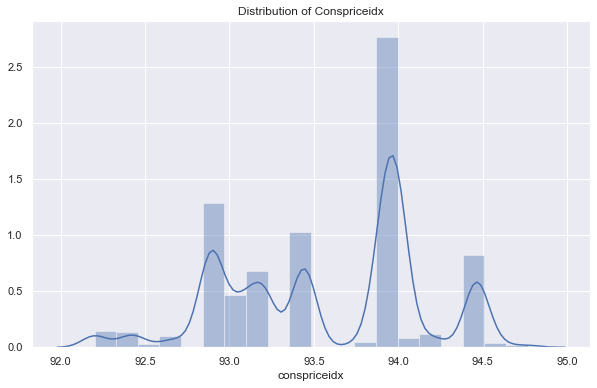

In [38]:
# distribution of conspriceidx
_ = plt.figure(figsize=(10,6))
_ = sns.distplot(df['conspriceidx'], bins = 20)
_ = plt.title('Distribution of Conspriceidx')
_ = plt.show()

In [39]:
# summarize conspriceidx statistics.
df.conspriceidx.describe()

count    41188.000000
mean        93.575664
std          0.578840
min         92.201000
25%         93.075000
50%         93.749000
75%         93.994000
max         94.767000
Name: conspriceidx, dtype: float64

In [40]:
# hypotesis test for difference of conspriceidx_yes mean and conspriceidx_no mean.
conspriceidx_yes = df[df.subscribed == 'yes']
conspriceidx_no = df[df.subscribed == 'no'] 
t_test = stats.ttest_ind(conspriceidx_yes.conspriceidx, conspriceidx_no.conspriceidx)
print('conspriceidx :', t_test)

conspriceidx : Ttest_indResult(statistic=-27.90322177968841, pvalue=9.318964779954352e-170)


Analysis: 

1. There is no outlier.
2. The consumer price index changes between the values 92.2 and 94.76. The mean is 93.57
3. The conspriceidx variable is statistically signicant at 95% confidence interval.

<b> 8. Consconfidx : </b>
Consumer confidence index (monthly indicator)

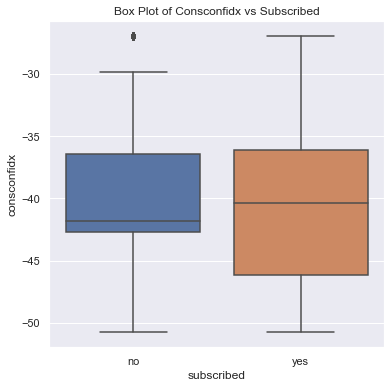

In [41]:
# boxplot of consconfidx
_ = plt.figure(figsize=(6,6))
_ = sns.boxplot(x= 'subscribed', y= 'consconfidx', data = df)
_ = plt.title('Box Plot of Consconfidx vs Subscribed')
_ = plt.show()

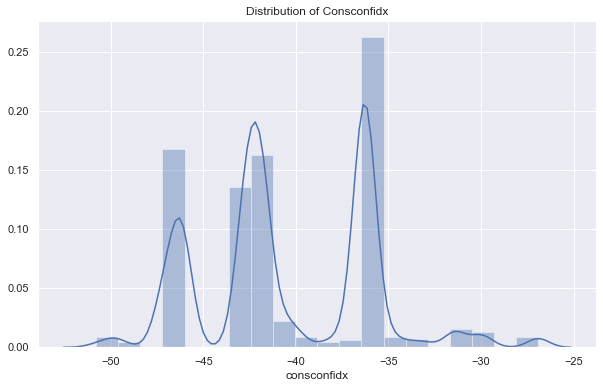

In [42]:
# distribution of consconfidx
_ = plt.figure(figsize=(10,6))
_ = sns.distplot(df['consconfidx'], bins = 20)
_ = plt.title('Distribution of Consconfidx')
_ = plt.show()

In [43]:
# summarize consconfidx statistics.
df.consconfidx.describe()

count    41188.000000
mean       -40.502600
std          4.628198
min        -50.800000
25%        -42.700000
50%        -41.800000
75%        -36.400000
max        -26.900000
Name: consconfidx, dtype: float64

In [44]:
# hypotesis test for difference of consconfidx_yes mean and consconfidx_no mean.
consconfidx_yes = df[df.subscribed == 'yes']
consconfidx_no = df[df.subscribed == 'no'] 
t_test = stats.ttest_ind(consconfidx_yes.consconfidx, consconfidx_no.consconfidx)
print('consconfidx :', t_test)

consconfidx : Ttest_indResult(statistic=11.153921944215295, pvalue=7.536664996589982e-29)


Analysis:

1. There is no outlier.
2. The consumer confidence index changes between the values -50.8 and -26.9. The mean is -40.5. All values are negative.
3. The consconfidx variable is statistically signicant at 95% confidence interval.

<b> 9. Euribor3m : </b>
Euribor 3-month rate (daily indicator)

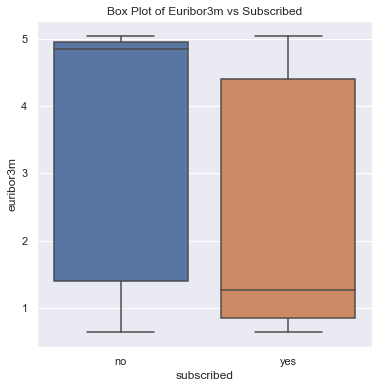

In [45]:
# boxplot of euribor3m
_ = plt.figure(figsize=(6,6))
_ = sns.boxplot(x= 'subscribed', y= 'euribor3m', data = df)
_ = plt.title('Box Plot of Euribor3m vs Subscribed')
_ = plt.show()

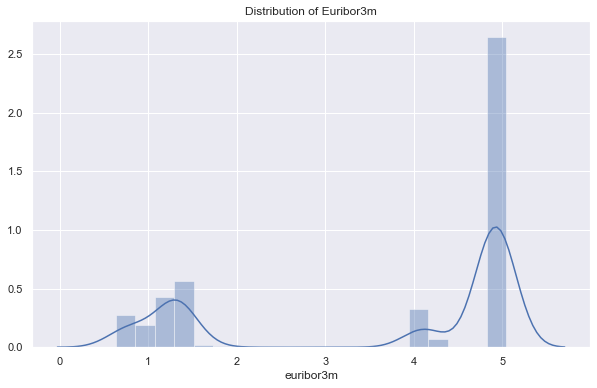

In [46]:
# distribution of euribor3m
_ = plt.figure(figsize=(10,6))
_ = sns.distplot(df['euribor3m'], bins = 20)
_ = plt.title('Distribution of Euribor3m')
_ = plt.show()

In [47]:
# summarize euribor3m statistics.
df.euribor3m.describe()

count    41188.000000
mean         3.621291
std          1.734447
min          0.634000
25%          1.344000
50%          4.857000
75%          4.961000
max          5.045000
Name: euribor3m, dtype: float64

In [48]:
# hypotesis test for difference of euribor3m_yes mean and euribor3m_no mean.
euribor3m_yes = df[df.subscribed == 'yes']
euribor3m_no = df[df.subscribed == 'no'] 
t_test = stats.ttest_ind(euribor3m_yes.euribor3m, euribor3m_no.euribor3m)
print('euribor3m :', t_test)

euribor3m : Ttest_indResult(statistic=-65.64662251866282, pvalue=0.0)


Analysis:

1. There is no outlier.
2. The euribor rate changes between the values 0.63 and 5.04. The mean is 3.6.
3. The euribor3m variable is statistically signicant at 95% confidence interval.

<b> 10. Nremployed : </b> Number of employees (quarterly indicator)

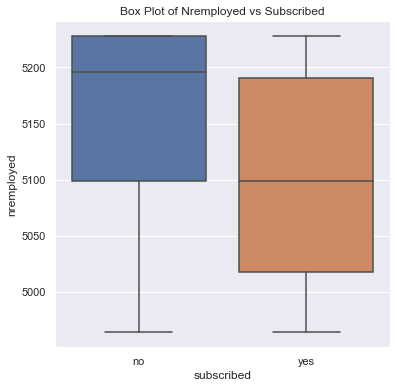

In [49]:
# boxplot of nremployed
_ = plt.figure(figsize=(6,6))
_ = sns.boxplot(x= 'subscribed', y= 'nremployed', data = df)
_ = plt.title('Box Plot of Nremployed vs Subscribed')
_ = plt.show()

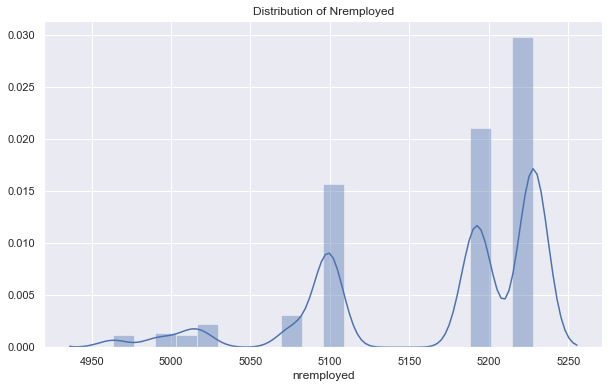

In [50]:
# distribution of nremployed
_ = plt.figure(figsize=(10,6))
_ = sns.distplot(df['nremployed'], bins = 20)
_ = plt.title('Distribution of Nremployed')
_ = plt.show()

In [51]:
# summarize nremployed statistics.
df.nremployed.describe()

count    41188.000000
mean      5167.035911
std         72.251528
min       4963.600000
25%       5099.100000
50%       5191.000000
75%       5228.100000
max       5228.100000
Name: nremployed, dtype: float64

In [52]:
# hypotesis test for difference of nremployed_yes mean and nremployed_no mean.
nremployed_yes = df[df.subscribed == 'yes']
nremployed_no = df[df.subscribed == 'no'] 
t_test = stats.ttest_ind(nremployed_yes.nremployed, nremployed_no.nremployed)
print('nremployed :', t_test)

nremployed : Ttest_indResult(statistic=-76.98448315100894, pvalue=0.0)


Analysis:

1. There is no outlier.
2. The number of empoyeees changes between the values 4963 and 5228. The mean is 5167
3. The nremployed variable is statistically signicant at 95% confidence interval.

<b> Correlation Between Numerical Variables:

In [53]:
# drop age_group from data.
df = df.drop(columns = ['age_group'])

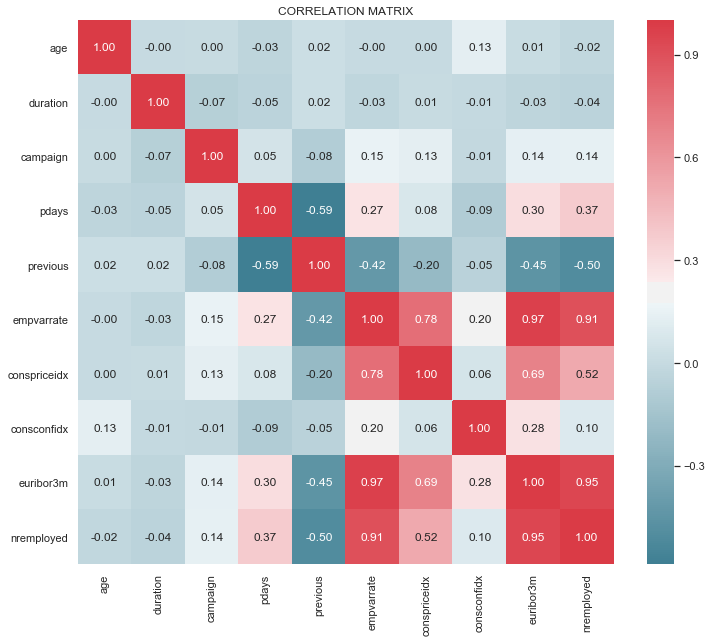

In [54]:
# visualize the correlation between numeric variables.
cmap = sns.diverging_palette(220, 10, as_cmap=True)
_ = sns.set_context("notebook",font_scale = 1.0, rc = {"lines.linewidth":2.5})
_ = plt.figure(figsize = (12,10))
_ = sns.heatmap(df.corr(), annot = True, fmt = ".2f", cmap = cmap )
_ = plt.title('CORRELATION MATRIX')

When we analyze the correlation between numeric variables, the variables 'nremployed', 'empvarrate' and 'euribor3m' are high correlated with each other. 

<b> Categorical Variables:

<b>1.Job: </b> Client's occupation

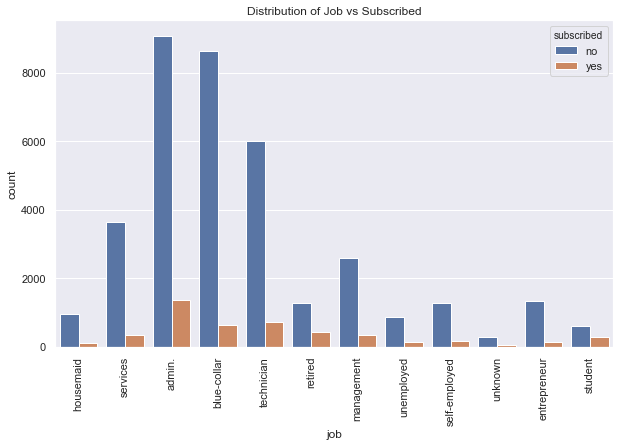

In [55]:
# distribution of job vs subscribed.
plt.figure(figsize=(10,6))
sns.countplot(x='job', hue='subscribed', data=df)
plt.title('Distribution of Job vs Subscribed')
plt.xticks(rotation='vertical')
plt.show()

In [56]:
# chi-square test for job_yes and job_no
job_crosstab = pd.crosstab(df.job, df.subscribed)
chi2, p, dof, expected = stats.chi2_contingency(observed = job_crosstab)
print('job p value:', p)
print(pd.crosstab(df.job, df.subscribed, normalize= 'index'))

job p value: 4.189763287563623e-199
subscribed           no       yes
job                              
admin.         0.870274  0.129726
blue-collar    0.931057  0.068943
entrepreneur   0.914835  0.085165
housemaid      0.900000  0.100000
management     0.887825  0.112175
retired        0.747674  0.252326
self-employed  0.895144  0.104856
services       0.918619  0.081381
student        0.685714  0.314286
technician     0.891740  0.108260
unemployed     0.857988  0.142012
unknown        0.887879  0.112121


Analysis:

1. There are unknown values.
2. Administrative, blue-collar and technician jobs are observed more than other type of jobs.
3. The rate of subscribing term deposit increases for student and retired clients. Blue-collar, entrepreneur and services jobs tend to give negative response to term deposit.
4. The job variable is statistically signicant at 95% confidence interval.


<b>2. Marital: </b> Marital status (note: 'divorced' means divorced or widowed)

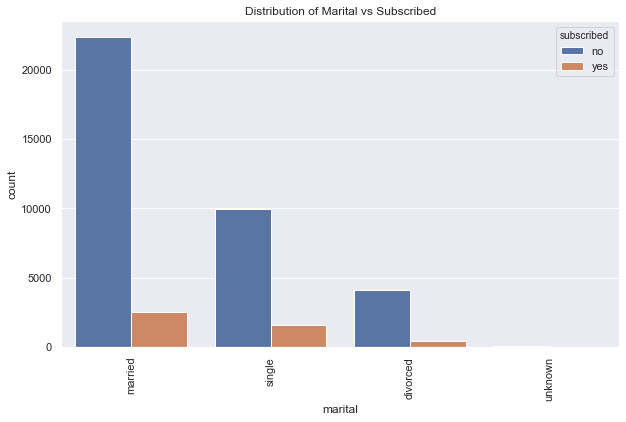

In [57]:
# distribution of marital vs subscribed.
plt.figure(figsize=(10,6))
sns.countplot(x='marital', hue='subscribed', data=df)
plt.title('Distribution of Marital vs Subscribed')
plt.xticks(rotation='vertical')
plt.show()

In [58]:
# chi-square test for marital_yes and marital_no
marital_crosstab = pd.crosstab(df.marital, df.subscribed)
chi2, p, dof, expected = stats.chi2_contingency(observed = marital_crosstab)
print('marital p value:', p)
print(pd.crosstab(df.marital, df.subscribed, normalize= 'index'))

marital p value: 2.068014648442211e-26
subscribed        no       yes
marital                       
divorced    0.896791  0.103209
married     0.898427  0.101573
single      0.859959  0.140041
unknown     0.850000  0.150000


Anaysis:

1. There are a few unknown values.
2. The single clients tend to response positive to subscribe the term deposit.
3. The marital variable is statistically signicant at 95% confidence interval.

<b> 3.Education: </b> 
    Client's education level

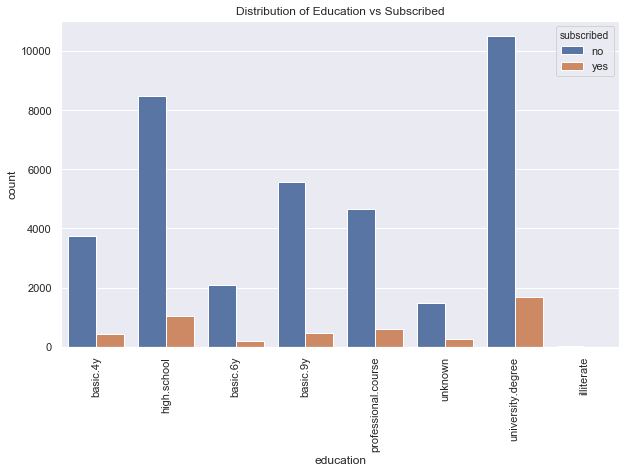

In [59]:
# distribution of education vs subscribed.
plt.figure(figsize=(10,6))
sns.countplot(x='education', hue='subscribed', data=df)
plt.title('Distribution of Education vs Subscribed')
plt.xticks(rotation='vertical')
plt.show()

In [60]:
# chi-square test for education_yes and education_no
education_crosstab = pd.crosstab(df.education, df.subscribed)
chi2, p, dof, expected = stats.chi2_contingency(observed = education_crosstab)
print('education p value:', p)
print(pd.crosstab(df.education, df.subscribed, normalize= 'index'))

education p value: 3.3051890144025054e-38
subscribed                 no       yes
education                              
basic.4y             0.897510  0.102490
basic.6y             0.917976  0.082024
basic.9y             0.921754  0.078246
high.school          0.891645  0.108355
illiterate           0.777778  0.222222
professional.course  0.886515  0.113485
university.degree    0.862755  0.137245
unknown              0.854997  0.145003


Anaysis:

1. There are unknown values.
2. The illiterate clients have more positive rate to subscribe term deposit comparing to other education levels.
3. The education variable is statistically signicant at 95% confidence interval.

<b> 4. Default: </b> Indicates whether the client has credit in default

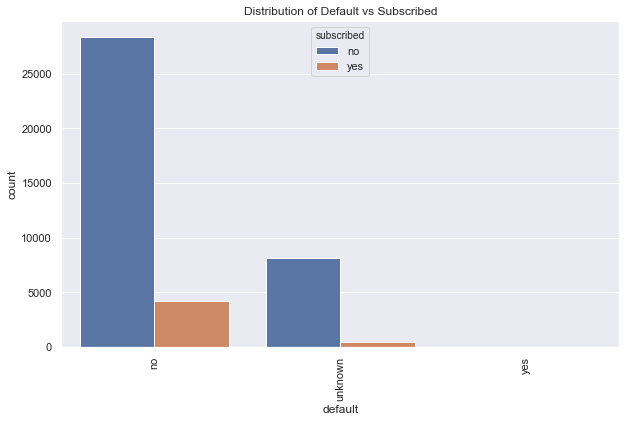

In [61]:
# distribution of default vs subscribed.
plt.figure(figsize=(10,6))
sns.countplot(x='default', hue='subscribed', data=df)
plt.title('Distribution of Default vs Subscribed')
plt.xticks(rotation='vertical')
plt.show()

In [62]:
# see the values in detailed.
print(pd.crosstab(df.default, df.subscribed))

subscribed     no   yes
default                
no          28391  4197
unknown      8154   443
yes             3     0


In [63]:
df.default.value_counts(normalize= True)

no         0.791201
unknown    0.208726
yes        0.000073
Name: default, dtype: float64

Analysis:

%20 of the default variable is unknow. This is a very high rate. Also, there is only 3 clients having credit in default. Because of not being meaningful, the default column will be dropped.

<b>5. Housing: </b> Indicates whether the client has a housing loan

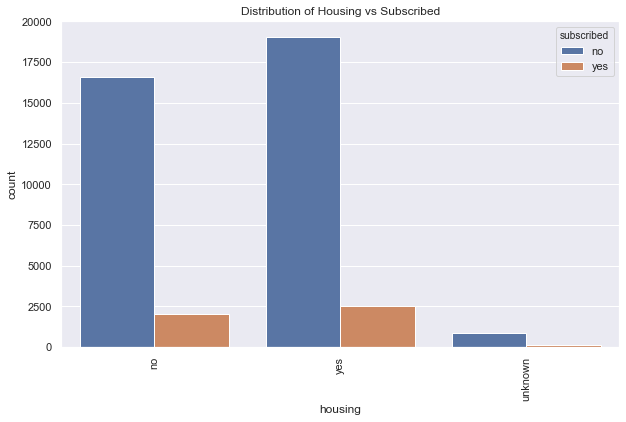

In [64]:
# distribution of housing vs subscribed.
plt.figure(figsize=(10,6))
sns.countplot(x='housing', hue='subscribed', data=df)
plt.title('Distribution of Housing vs Subscribed')
plt.xticks(rotation='vertical')
plt.show()

In [65]:
# chi-square test for housing_yes and housing_no
housing_crosstab = pd.crosstab(df.housing, df.subscribed)
chi2, p, dof, expected = stats.chi2_contingency(observed = housing_crosstab)
print('housing p value:', p)
print(pd.crosstab(df.housing, df.subscribed, normalize= 'index'))

housing p value: 0.05829447669453452
subscribed        no       yes
housing                       
no          0.891204  0.108796
unknown     0.891919  0.108081
yes         0.883806  0.116194


Analysis:

1. There a few unknown values.
2. There is no meaningful difference between the clients having house loan or not in terms of subscribing term deposit.
3. The housing variable will be dropped beause of not having any affect on the output.

<b> 6.Loan: </b> Indicates whether the client has a personal loan

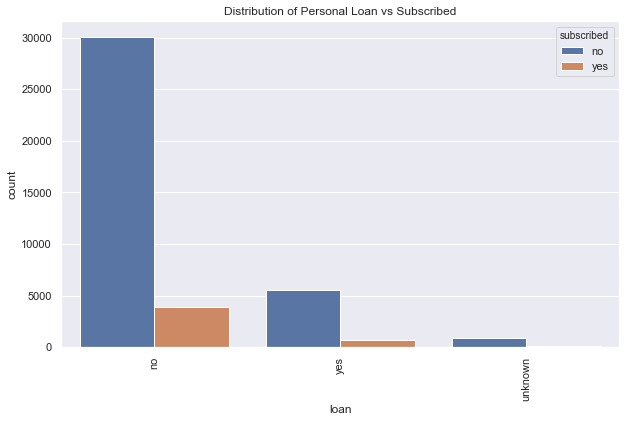

In [66]:
# distribution of loan vs subscribed.
plt.figure(figsize=(10,6))
sns.countplot(x='loan', hue='subscribed', data=df)
plt.title('Distribution of Personal Loan vs Subscribed')
plt.xticks(rotation='vertical')
plt.show()

In [67]:
# chi-square test for loan_yes and loan_no
loan_crosstab = pd.crosstab(df.loan, df.subscribed)
chi2, p, dof, expected = stats.chi2_contingency(observed = loan_crosstab)
print('loan p value:', p)
print(pd.crosstab(df.loan, df.subscribed, normalize= 'index'))

loan p value: 0.5786752870441754
subscribed        no       yes
loan                          
no          0.886598  0.113402
unknown     0.891919  0.108081
yes         0.890685  0.109315


Analysis:

1. There a few unknown values.
2. There is no meaningful difference between the clients having personal loan or not in terms of subscribing term deposit.
3. The loan variable will be dropped beause of not having any affect on the output.

<b> 7.Contact: </b> Type of contact communication

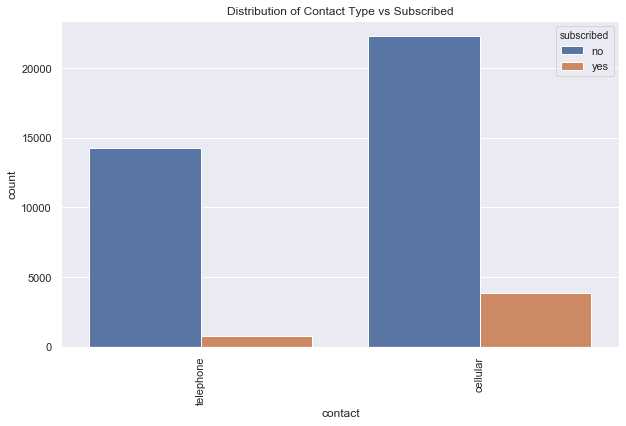

In [68]:
# distribution of contact vs subscribed.
plt.figure(figsize=(10,6))
sns.countplot(x='contact', hue='subscribed', data=df)
plt.title('Distribution of Contact Type vs Subscribed')
plt.xticks(rotation='vertical')
plt.show()

In [69]:
# chi-square test for contact_yes and contact_no
contact_crosstab = pd.crosstab(df.contact, df.subscribed)
chi2, p, dof, expected = stats.chi2_contingency(observed = contact_crosstab)
print('loan p value:', p)
print(pd.crosstab(df.contact, df.subscribed, normalize= 'index'))

loan p value: 1.5259856523129964e-189
subscribed        no       yes
contact                       
cellular    0.852624  0.147376
telephone   0.947687  0.052313


Analysis:

1. The rate of responsing the campaign positively is higher for the clients contacted via cellular.
2. The contact type variable is statistically signicant at 95% confidence interval.

<b> 8.Month: </b> Month that last contact was made

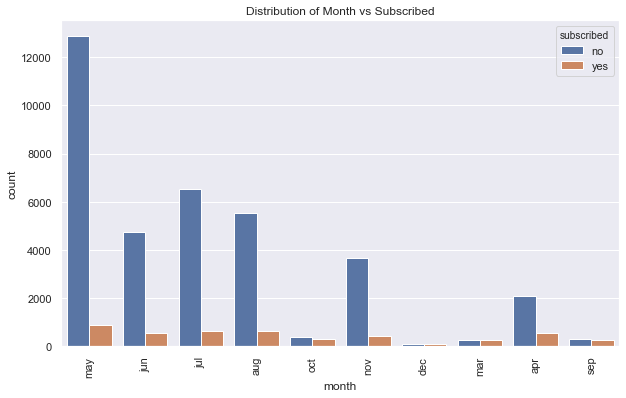

In [70]:
# distribution of month vs subscribed.
plt.figure(figsize=(10,6))
sns.countplot(x='month', hue='subscribed', data=df)
plt.title('Distribution of Month vs Subscribed')
plt.xticks(rotation='vertical')
plt.show()

In [71]:
# chi-square test for month_yes and month_no
month_crosstab = pd.crosstab(df.month, df.subscribed)
chi2, p, dof, expected = stats.chi2_contingency(observed = month_crosstab)
print('month p value:', p)
print(pd.crosstab(df.month, df.subscribed, normalize= 'index'))

month p value: 0.0
subscribed        no       yes
month                         
apr         0.795213  0.204787
aug         0.893979  0.106021
dec         0.510989  0.489011
jul         0.909534  0.090466
jun         0.894885  0.105115
mar         0.494505  0.505495
may         0.935653  0.064347
nov         0.898561  0.101439
oct         0.561281  0.438719
sep         0.550877  0.449123


Analysis:

1. The rate of response 'yes' is higher for the months of March, December, October and September. The months May and July have negative affect on subscribing term deposit.
2. The month variable is statistically signicant at 95% confidence interval.

<b> 9.Day_of_Week: </b> Day that last contact was made

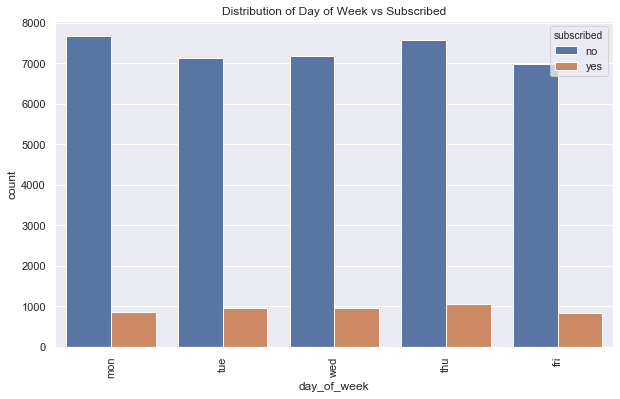

In [72]:
# distribution of day_of_week vs subscribed.
plt.figure(figsize=(10,6))
sns.countplot(x='day_of_week', hue='subscribed', data=df)
plt.title('Distribution of Day of Week vs Subscribed')
plt.xticks(rotation='vertical')
plt.show()

In [73]:
# chi-square test for day_of_week_yes and day_of_week_no
day_of_week_crosstab = pd.crosstab(df.day_of_week, df.subscribed)
chi2, p, dof, expected = stats.chi2_contingency(observed = day_of_week_crosstab)
print('day_of_week p value:', p)
print(pd.crosstab(df.day_of_week, df.subscribed, normalize= 'index'))

day_of_week p value: 2.9584820052785324e-05
subscribed         no       yes
day_of_week                    
fri          0.891913  0.108087
mon          0.900517  0.099483
thu          0.878812  0.121188
tue          0.882200  0.117800
wed          0.883329  0.116671


Analysis:

1. Monday and Friday have more 'yes' response to subscribe term deposit comparing to other days of the week.
2. The day of week variable is statistically signicant at 95% confidence interval.

<b> 10. Poutcome: </b> Outcome of the previous marketing campaign

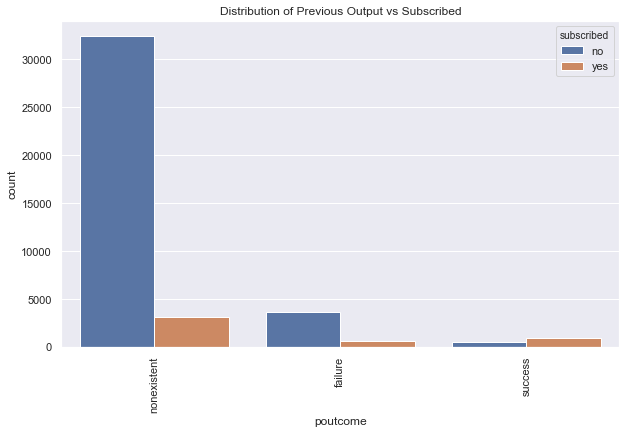

In [74]:
# distribution of poutcome vs subscribed.
plt.figure(figsize=(10,6))
sns.countplot(x='poutcome', hue='subscribed', data=df)
plt.title('Distribution of Previous Output vs Subscribed')
plt.xticks(rotation='vertical')
plt.show()

In [75]:
# chi-square test for poutcome_yes and poutcome_no
poutcome_crosstab = pd.crosstab(df.poutcome, df.subscribed)
chi2, p, dof, expected = stats.chi2_contingency(observed = poutcome_crosstab)
print('poutcome p value:', p)
print(pd.crosstab(df.poutcome, df.subscribed, normalize= 'index'))

poutcome p value: 0.0
subscribed         no       yes
poutcome                       
failure      0.857714  0.142286
nonexistent  0.911678  0.088322
success      0.348871  0.651129


Analysis: 

1. If the previous outcome is successed, the probabality of saying 'yes' to new campaign is higher. The clients not contacted for previous marketing campaign tend to say 'no' for new campign comparing to other clients.
2. The previous outcome variable is statistically signicant at 95% confidence interval.

<b> PART 3. DATA PREPROCESSING

<b> Unneccassary Columns:

In [76]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,empvarrate,conspriceidx,consconfidx,euribor3m,nremployed,subscribed
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [77]:
# delete unneccessary columns.
df = df.drop(['duration', 'pdays', 'default', 'housing', 'loan'], axis=1)
df.columns

Index(['age', 'job', 'marital', 'education', 'contact', 'month', 'day_of_week',
       'campaign', 'previous', 'poutcome', 'empvarrate', 'conspriceidx',
       'consconfidx', 'euribor3m', 'nremployed', 'subscribed'],
      dtype='object')

In [78]:
df.head()

,age,job,marital,education,contact,month,day_of_week,campaign,previous,poutcome,empvarrate,conspriceidx,consconfidx,euribor3m,nremployed,subscribed
0,56,housemaid,married,basic.4y,telephone,may,mon,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,telephone,may,mon,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,telephone,may,mon,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,telephone,may,mon,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,telephone,may,mon,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


We will drop unneccassary colums from data. After the inference from our hypothesis test for each variables, we found that 'duration', 'pdays', 'default', ' 'housing', 'loan' are not meaningful for our model. Also, we will not use age_group column.

<b>Missing Values:

In [79]:
# find percentage of unknown values for columns.
print('job:', len(df.loc[df['job'] == 'unknown'])/len(df))
print('marital:',len(df.loc[df['marital'] == 'unknown'])/len(df))
print('education:' , len(df.loc[df['education'] == 'unknown'])/len(df))

job: 0.008012042342429833
marital: 0.0019423132951345051
education: 0.042026803923472855


In [80]:
# drop unknown values.
df = df[df != 'unknown']
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39191 entries, 0 to 41187
Data columns (total 16 columns):
age             39191 non-null int64
job             39191 non-null object
marital         39191 non-null object
education       39191 non-null object
contact         39191 non-null object
month           39191 non-null object
day_of_week     39191 non-null object
campaign        39191 non-null int64
previous        39191 non-null int64
poutcome        39191 non-null object
empvarrate      39191 non-null float64
conspriceidx    39191 non-null float64
consconfidx     39191 non-null float64
euribor3m       39191 non-null float64
nremployed      39191 non-null float64
subscribed      39191 non-null object
dtypes: float64(5), int64(3), object(8)
memory usage: 5.1+ MB


C:\Users\skisa\Anaconda3\lib\site-packages\pandas\core\ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


In our exploratory data anaaysis part, we discover that there are unknown values in some variables. After deleting unnneccary columns, only the variables 'job','marital' and 'education' have unknown values. The percentage of unknown values for each columns is very low so deleting these values does not effect our model very much. Currently, the data has 39,191 rows.

<b> Outliers:

In [81]:
# find the number of outliers.
print(' number of age outliers:',stats.iqr(df.age))
print(' number of campaign outliers:',stats.iqr(df.campaign))

 number of age outliers: 15.0
 number of campaign outliers: 2.0


In [82]:
print('min age:',min(df.age), 'max age:',max(df.age))
print('min campaign:',min(df.campaign), 'max campaign:' ,max(df.campaign))

min age: 17 max age: 98
min campaign: 1 max campaign: 56


After cleaning data by deleting unneccassary and missing values, only 'age' and ' campaign' features have outliers. Age variable has 15 and campaign variable has 2 outliers. The clients' ages change between 17 and 98. There is no anormal age in the data. Also, the number of contacts performed during the campaign change between 1 and 56. These values are also very normal in real model. Thus, we will not remove outliers to create a realistic model.

<b> Output and Input Variables:

In [83]:
df.subscribed[df.subscribed == 'yes'] = 1 
df.subscribed[df.subscribed == 'no'] = 0

C:\Users\skisa\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [84]:
# seperate categorical and numerical columns
cat_columns = ['job', 'marital','education','contact', 'month','day_of_week', 'poutcome']
df[cat_columns].head()

,job,marital,education,contact,month,day_of_week,poutcome
0,housemaid,married,basic.4y,telephone,may,mon,nonexistent
1,services,married,high.school,telephone,may,mon,nonexistent
2,services,married,high.school,telephone,may,mon,nonexistent
3,admin.,married,basic.6y,telephone,may,mon,nonexistent
4,services,married,high.school,telephone,may,mon,nonexistent


In [85]:
num_columns = ['age','campaign', 'previous', 'empvarrate', 'conspriceidx','consconfidx', 'euribor3m', 'nremployed']
df[num_columns].head()

,age,campaign,previous,empvarrate,conspriceidx,consconfidx,euribor3m,nremployed
0,56,1,0,1.1,93.994,-36.4,4.857,5191.0
1,57,1,0,1.1,93.994,-36.4,4.857,5191.0
2,37,1,0,1.1,93.994,-36.4,4.857,5191.0
3,40,1,0,1.1,93.994,-36.4,4.857,5191.0
4,56,1,0,1.1,93.994,-36.4,4.857,5191.0


In [86]:
# build output variable y.
y = df['subscribed']
y = y.astype('int')
y.head()

0    0
1    0
2    0
3    0
4    0
Name: subscribed, dtype: int32

In [87]:
# build new dataframe with dummy variables.
dummies = pd.get_dummies(df[cat_columns])
num_df = df[num_columns]
df_new = pd.concat([num_df,dummies,y],axis = 1)
df = df_new
df.head()

,age,campaign,previous,empvarrate,conspriceidx,consconfidx,euribor3m,nremployed,job_admin.,job_blue-collar,...,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,subscribed
0,56,1,0,1.1,93.994,-36.4,4.857,5191.0,0,0,...,0,0,1,0,0,0,0,1,0,0
1,57,1,0,1.1,93.994,-36.4,4.857,5191.0,0,0,...,0,0,1,0,0,0,0,1,0,0
2,37,1,0,1.1,93.994,-36.4,4.857,5191.0,0,0,...,0,0,1,0,0,0,0,1,0,0
3,40,1,0,1.1,93.994,-36.4,4.857,5191.0,1,0,...,0,0,1,0,0,0,0,1,0,0
4,56,1,0,1.1,93.994,-36.4,4.857,5191.0,0,0,...,0,0,1,0,0,0,0,1,0,0


In [88]:
# build input variables X.
X = df.drop('subscribed', axis =1)
y = df['subscribed']
X.head()

,age,campaign,previous,empvarrate,conspriceidx,consconfidx,euribor3m,nremployed,job_admin.,job_blue-collar,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,56,1,0,1.1,93.994,-36.4,4.857,5191.0,0,0,...,0,0,0,1,0,0,0,0,1,0
1,57,1,0,1.1,93.994,-36.4,4.857,5191.0,0,0,...,0,0,0,1,0,0,0,0,1,0
2,37,1,0,1.1,93.994,-36.4,4.857,5191.0,0,0,...,0,0,0,1,0,0,0,0,1,0
3,40,1,0,1.1,93.994,-36.4,4.857,5191.0,1,0,...,0,0,0,1,0,0,0,0,1,0
4,56,1,0,1.1,93.994,-36.4,4.857,5191.0,0,0,...,0,0,0,1,0,0,0,0,1,0


We built output variable as 'y' and its values as 0 and 1. Also, we changed the categorical variables to dummy variables. Then, we created a new data frame including numerical varibales and dummy varibales for predictors called 'X'.

<b> Train and Test Split

In [89]:
# split data into train and test.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

We splitted the data into two parts. The train data consists of %80 of the data. The test data consists of %20 of the data.

<b>Feature Scaling

In [90]:
# standardize the data
scaler = StandardScaler()
X = scaler.fit_transform(X)
X

array([[ 1.56898642, -0.56505711, -0.34904453, ..., -0.33920437,
         0.39605756, -0.18300458],
       [ 1.66618545, -0.56505711, -0.34904453, ..., -0.33920437,
         0.39605756, -0.18300458],
       [-0.27779513, -0.56505711, -0.34904453, ..., -0.33920437,
         0.39605756, -0.18300458],
       ...,
       [ 1.56898642, -0.20431636, -0.34904453, ..., -0.33920437,
         0.39605756, -0.18300458],
       [ 0.40259808, -0.56505711, -0.34904453, ..., -0.33920437,
         0.39605756, -0.18300458],
       [ 3.31856895,  0.15642439,  1.69907708, ...,  2.9480752 ,
        -2.52488555, -0.18300458]])

We transformed the data in such a manner that features have mean as 0 and standard deviation as 1. In short, we standardized and arranged the data in normal distribution. 

<b>PART 4. MACHINE LEARNING

<b>Principal Component Analysis (PCA)

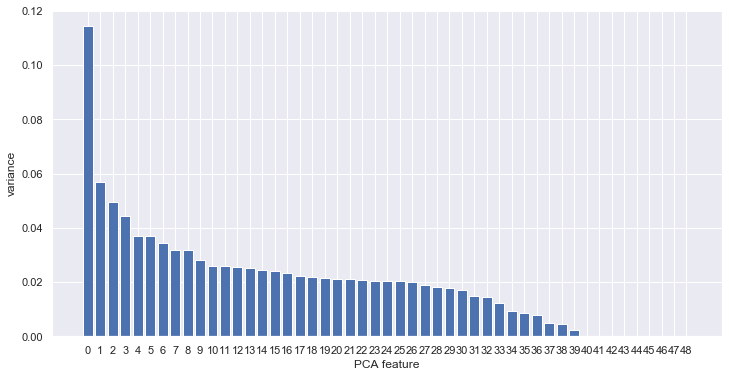

In [91]:
# visualize pca variance.
pca = PCA()
pca.fit(X)
features = range(pca.n_components_)
plt.figure(figsize = (12,6))
plt.bar(features, pca.explained_variance_ratio_)
plt.xticks(features)
plt.ylabel('variance')
plt.xlabel('PCA feature')
plt.show()

In [92]:
# build PCA model with 29 components.
pca = PCA(n_components = 29)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

We can speed up the fitting of a machine learning algorithm by changing the optimization algorithm. A more common way of speeding up a machine learning algorithm is by using Principal Component Analysis (PCA). If learning algorithms are too slow because the input dimension is too high, then using PCA to speed it up can be a reasonable choice. Thus, we use PCA to reduce the number of variables. In order to protect %90 of variance (information), we chose first 29 variables. We don want to lose %90 variance. 

<b> Logistic Regression Model

In [109]:
# build logistic regression model
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
LR_accuracy =  accuracy_score(y_pred, y_test)
print('Accuracy score:' , LR_accuracy)

C:\Users\skisa\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Accuracy score: 0.8939915805587447


AUC score: 0.7819797420969556


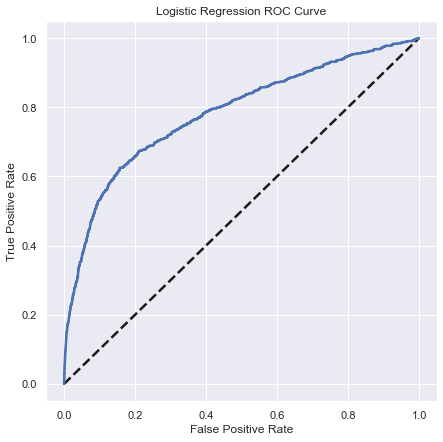

In [110]:
# measure performance of the model with roc and auc 
y_pred_prob = logreg.predict_proba(X_test)[:,1]

LR_AUC = roc_auc_score(y_test, y_pred_prob)
print('AUC score:', LR_AUC)

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
_ = plt.figure(figsize = (7,7))
_ = plt.plot([0,1],[0,1],'k--')
_ = plt.plot(fpr, tpr, label='Logistic Regression')
_ = plt.xlabel('False Positive Rate')
_ = plt.ylabel('True Positive Rate')
_ = plt.title('Logistic Regression ROC Curve')
_ = plt.show()

Accuracy of Model:
               precision    recall  f1-score   support

           0       0.90      0.99      0.94      6932
           1       0.64      0.19      0.29       907

    accuracy                           0.89      7839
   macro avg       0.77      0.59      0.62      7839
weighted avg       0.87      0.89      0.87      7839



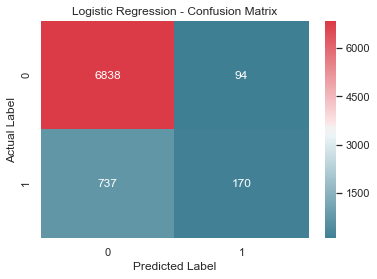

In [111]:
#measure the performance of the model with confusion matrix.
print('Accuracy of Model:\n', classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(cm)
sns.heatmap(df_cm, annot = True, fmt = 'd', cmap = cmap)
plt.title('Logistic Regression - Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()

<b>KNN Model

In [112]:
# build KNN model.
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_train)
y_pred = knn_clf.predict(X_test) 
KNN_accuracy = accuracy_score(y_pred, y_test)
print('Accuracy score:' , KNN_accuracy)

Accuracy score: 0.887613215971425


AUC score: 0.7267775606919573


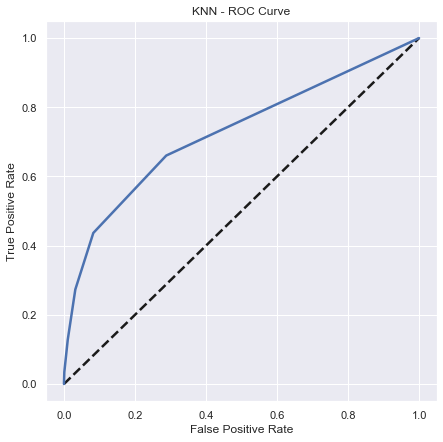

In [113]:
# measure performance of the model with roc and auc
y_pred_prob = knn_clf.predict_proba(X_test)[:,1]

KNN_AUC = roc_auc_score(y_test, y_pred_prob)
print('AUC score:', KNN_AUC)

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
_ = plt.figure(figsize = (7,7))
_ = plt.plot([0,1],[0,1],'k--')
_ = plt.plot(fpr, tpr, label='KNN')
_ = plt.xlabel('False Positive Rate')
_ = plt.ylabel('True Positive Rate')
_ = plt.title('KNN - ROC Curve')
_ = plt.show()

Accuracy of Model:
               precision    recall  f1-score   support

           0       0.91      0.97      0.94      6932
           1       0.53      0.27      0.36       907

    accuracy                           0.89      7839
   macro avg       0.72      0.62      0.65      7839
weighted avg       0.87      0.89      0.87      7839



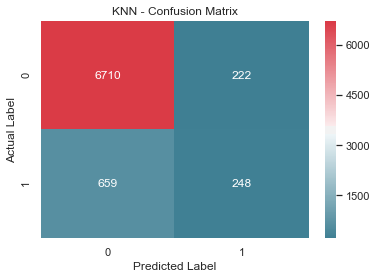

In [114]:
#measure the performance of the model with confusion matrix.
print('Accuracy of Model:\n', classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(cm)
sns.heatmap(df_cm, annot = True, fmt = 'd', cmap = cmap)
plt.title('KNN - Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()

<b> SVM Model

In [115]:
# build SVM model.
svm_clf = SVC(gamma = 'auto', probability = True)
svm_clf.fit(X_train, y_train)
y_pred = svm_clf.predict(X_test) 
SVM_accuracy = accuracy_score(y_pred, y_test)
print('Accuracy score:' , SVM_accuracy)

Accuracy score: 0.8923332057660416


AUC score: 0.7153719133927248


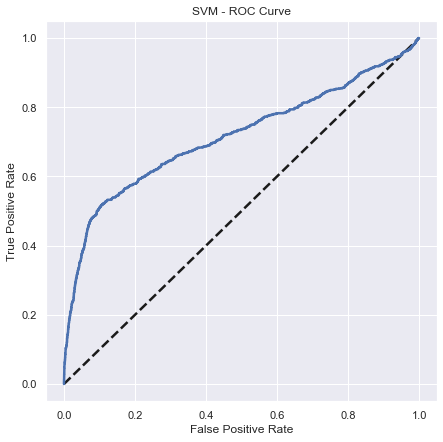

In [116]:
# measure performance of the model with roc and auc
y_pred_prob = svm_clf.predict_proba(X_test)[:,1]

SVM_AUC = roc_auc_score(y_test, y_pred_prob)
print('AUC score:',SVM_AUC )

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
_ = plt.figure(figsize = (7,7))
_ = plt.plot([0,1],[0,1],'k--')
_ = plt.plot(fpr, tpr, label='SVM')
_ = plt.xlabel('False Positive Rate')
_ = plt.ylabel('True Positive Rate')
_ = plt.title('SVM - ROC Curve')
_ = plt.show()

Accuracy of Model:
               precision    recall  f1-score   support

           0       0.90      0.98      0.94      6932
           1       0.60      0.20      0.30       907

    accuracy                           0.89      7839
   macro avg       0.75      0.59      0.62      7839
weighted avg       0.87      0.89      0.87      7839



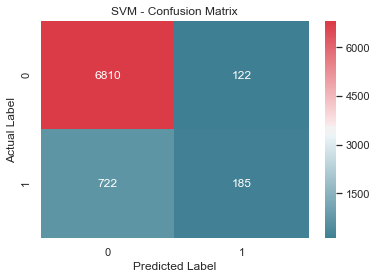

In [117]:
#measure the performance of the model with confusion matrix.
print('Accuracy of Model:\n', classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(cm)
sns.heatmap(df_cm, annot = True, fmt = 'd', cmap = cmap)
plt.title('SVM - Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()

<b>Random Forest Model

In [118]:
#build random forest model.
RF_clf = RandomForestClassifier(n_estimators = 100)
RF_clf.fit(X_train, y_train)
y_pred = RF_clf.predict(X_test)
RF_accuracy = accuracy_score(y_pred, y_test)
print('Accuracy score:' , RF_accuracy)

Accuracy score: 0.8867202449292002


AUC score: 0.7518258165158977


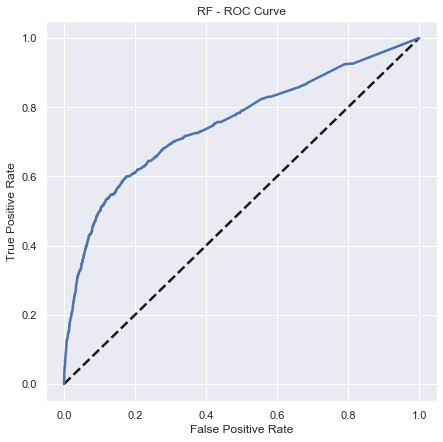

In [119]:
# measure performance of the model with roc and auc
y_pred_prob = RF_clf.predict_proba(X_test)[:,1]

RF_AUC = roc_auc_score(y_test, y_pred_prob)
print('AUC score:',RF_AUC)

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
_ = plt.figure(figsize = (7,7))
_ = plt.plot([0,1],[0,1],'k--')
_ = plt.plot(fpr, tpr, label='')
_ = plt.xlabel('False Positive Rate')
_ = plt.ylabel('True Positive Rate')
_ = plt.title('RF - ROC Curve')
_ = plt.show()


Accuracy of Model:
               precision    recall  f1-score   support

           0       0.91      0.96      0.94      6932
           1       0.52      0.29      0.37       907

    accuracy                           0.89      7839
   macro avg       0.72      0.63      0.66      7839
weighted avg       0.87      0.89      0.87      7839



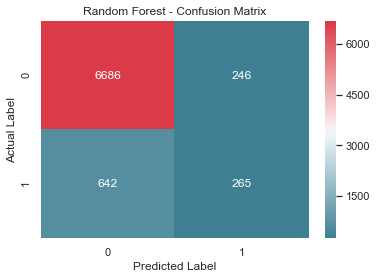

In [120]:
#measure the performance of the model with confusion matrix.
print('Accuracy of Model:\n', classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(cm)
sns.heatmap(df_cm, annot = True, fmt = 'd', cmap = cmap)
plt.title('Random Forest - Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()

<b> Model Selection

In [121]:
AUC_scores= pd.DataFrame({'Model': ['Logistic Regression', 'KNN', 'SVM', 'Random Forest'], 'AUC Score': [LR_AUC, KNN_AUC, SVM_AUC, RF_AUC ]}, index = None)
AUC_scores

,Model,AUC Score
0,Logistic Regression,0.781980
1,KNN,0.726778
2,SVM,0.715372
3,Random Forest,0.751826


AUC - ROC curve is a performance measurement for classification problem at various thresholds settings. ROC is a probability curve and AUC represents degree or measure of separability. It tells how much model is capable of distinguishing between classes. Higher the AUC, better the model is at predicting 0s as 0s and 1s as 1s. When we compare the AUC scores of the models, Logistic regression has the higher score. This model is the best for our classification model.